In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision

In [ ]:
class MultiClassSVM(nn.Module):
    def __init__(self, input_size, num_classes):
        super(MultiClassSVM, self).__init__()
        self.linear = nn.Linear(input_size, num_classes,bias=False)

    def forward(self, x):
        return self.linear(x)
    
def hinge_loss(outputs, labels):
    num_classes = outputs.size(1)
    correct_indices = labels.view(-1, 1)
    correct_scores = outputs.gather(1, correct_indices)
    margins = torch.clamp(1 - (correct_scores - outputs), min=0)
    margins.scatter_(1, correct_indices, 0)
    loss = margins.mean()
    return loss

def train(
    model,
    train_loader,    
    ):
    for batch_idx, (data, target) in enumerate(train_loader):
        output = model(data.float())
        loss = hinge_loss(output, target)
        loss.backward()
        _, argmax = torch.max(output, 1)
        accuracy = (target == argmax.squeeze()).float().mean()
        print("accuracy is",accuracy)


In [ ]:
svm = MultiClassSVM(input_size=28,num_classes=10)

train_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST(
        root=".",
        train=True,
        download=True,
        transform=torchvision.transforms.Compose(
            [
                torchvision.transforms.PILToTensor(),
                
            ]
        ),
        
    ),
    batch_size=64,
    shuffle=True,
    
)
test_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST(
        root=".",
        train=False,
        transform=torchvision.transforms.Compose(
            [
                torchvision.transforms.PILToTensor(),
                
            ]
        ),
    ),
    batch_size=64,
)
train(svm,train_loader)

In [17]:
import numpy as np
import os
data = np.load('E:/ASU/Norse/w1.npy')
print(data)

[[[[0.78178895 0.84194463 0.81851226 0.83791804 0.7805212 ]
   [0.77511454 0.8273548  0.75787264 0.7980831  0.892136  ]
   [0.80447245 0.8321421  0.82224673 0.82468647 0.8001926 ]
   [0.7891664  0.7609656  0.91468483 0.8354029  0.77527803]
   [0.79202574 0.812589   0.7713294  0.7905338  0.86858535]]]


 [[[0.7454315  0.8145571  0.8769233  0.77872753 0.7975745 ]
   [0.72774184 0.82777035 0.73198605 0.7812075  0.7530029 ]
   [0.7722395  0.8318275  0.9170076  0.82930446 0.75873023]
   [0.74937624 0.8720025  0.79126287 0.7292548  0.76021045]
   [0.81024027 0.7304693  0.80653507 0.7746586  0.7746299 ]]]


 [[[0.82938623 0.8067426  0.91556853 0.8111751  0.8371296 ]
   [0.79967993 0.7515663  0.8066215  0.82086897 0.8506696 ]
   [0.7691606  0.87990123 0.6206397  0.8634703  0.7878922 ]
   [0.8336208  0.7996459  0.70255107 0.7710442  0.8632764 ]
   [0.7880633  0.7510405  0.84248835 0.8765248  0.84442526]]]


 [[[0.8337506  0.7794936  0.87083566 0.7406782  0.81091493]
   [0.74138784 0.86388844 0.

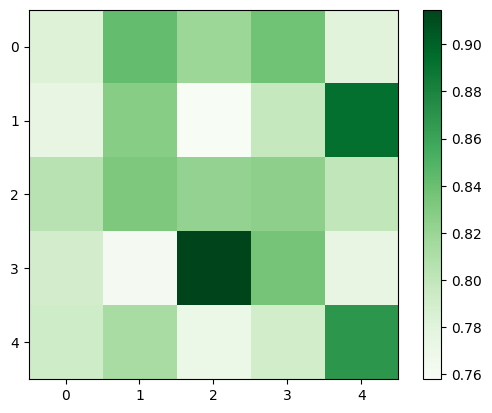

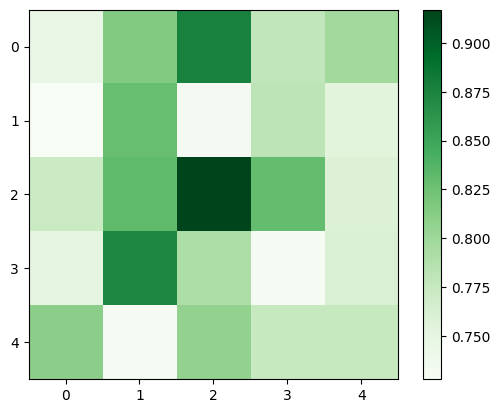

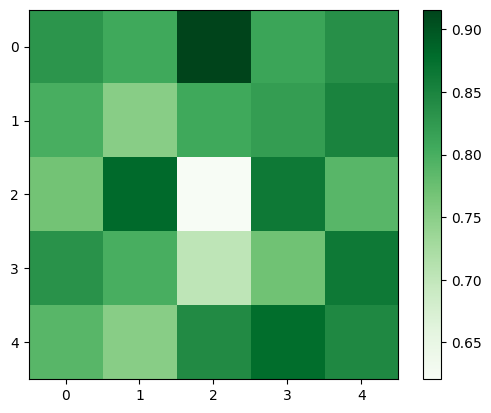

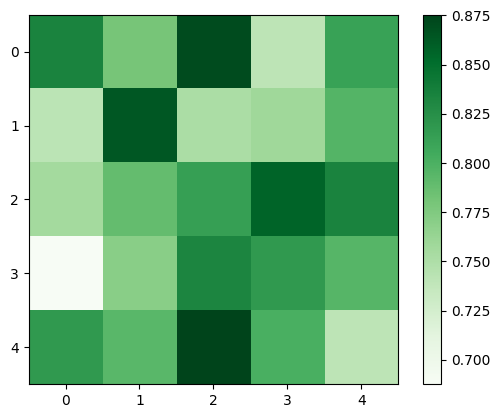

In [18]:
import numpy as np
import matplotlib.pyplot as plt
for i in range(data.shape[0]):
    plt.imshow(data[i,0], cmap='Greens', interpolation='nearest')
    plt.colorbar()  # 添加颜色条
    plt.show()
